In [79]:
from autoefficiency import data
import numpy as np
import pandas as pd
from tree.base import DecisionTree
from sklearn.model_selection import train_test_split
from metrics import rmse,accuracy,mae

In [48]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,49
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,36
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,231
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,14
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,161
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,153
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,301
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,119
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,159


In [49]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [50]:
data['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [51]:
# Replace '?' with NaN
data['horsepower'] = data['horsepower'].replace('?', np.nan)

# Convert to float, coerce errors to NaN
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [52]:
data['car name'] = data['car name'].astype('category').cat.codes

data['horsepower'] = data['horsepower'].astype(float)

In [53]:
most_frequent_value = data['horsepower'].mode()[0]
data['horsepower'] = data['horsepower'].fillna(most_frequent_value)

In [54]:
data['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [55]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name          int16
dtype: object

In [56]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,49
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,36
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,231
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,14
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,161
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,153
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,301
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,119
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,159


In [57]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name          int16
dtype: object

In [58]:
correlation_matrix = data.corr()

print(correlation_matrix['mpg'])

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.753177
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
car name        0.273936
Name: mpg, dtype: float64


In [59]:
bata = data.drop(columns=['car name'])
bata


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [60]:
bata.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [61]:
dk= DecisionTree(criterion="information_gain", max_depth=5)

In [62]:
X = bata.iloc[:, 1:]  # All columns except the first
y = bata.iloc[:, 0]   # Only the first column


In [63]:
X.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [64]:
y.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [65]:
X.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [67]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
157,8,350.0,145.0,4440.0,14.0,75,1
109,4,140.0,72.0,2401.0,19.5,73,1
17,6,200.0,85.0,2587.0,16.0,70,1
253,6,200.0,95.0,3155.0,18.2,78,1
24,6,199.0,90.0,2648.0,15.0,70,1
...,...,...,...,...,...,...,...
71,3,70.0,97.0,2330.0,13.5,72,3
106,8,350.0,180.0,4499.0,12.5,73,1
270,4,134.0,95.0,2515.0,14.8,78,3
348,4,89.0,62.0,2050.0,17.3,81,3


In [68]:
dk.fit(X_train,y_train)

In [69]:
y_pred=dk.predict(X_test)
y_pred

0      23.446763
1      23.446763
2      23.446763
3      23.446763
4      23.446763
         ...    
115    23.446763
116    23.446763
117    23.446763
118    27.000000
119    23.446763
Length: 120, dtype: float64

In [70]:
y_test

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
60     20.0
79     26.0
284    20.6
304    37.3
277    16.2
Name: mpg, Length: 120, dtype: float64

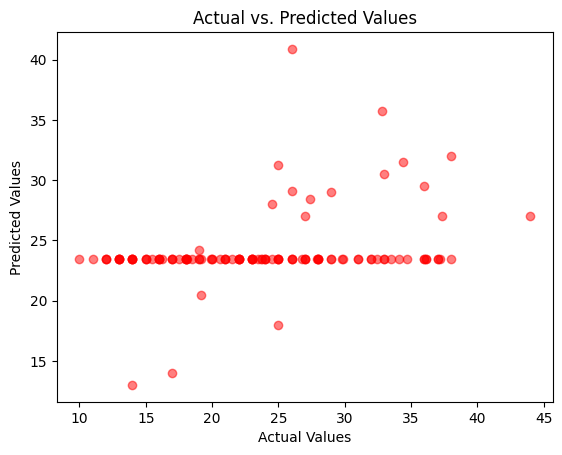

In [71]:
import matplotlib.pyplot as plt

# Scatter plot with a single color (e.g., blue)
plt.scatter(y_test, y_pred, alpha=0.5, color='red')  # You can use any named color or hex code
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


In [72]:
rmse(y_pred,y_test)

np.float64(7.616189017897032)

In [73]:
y_pred.dtype

dtype('float64')

In [74]:
y_test.dtype

dtype('float64')

In [75]:
# y_pred = y_pred.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)


In [76]:
y_pred

0      23.446763
1      23.446763
2      23.446763
3      23.446763
4      23.446763
         ...    
115    23.446763
116    23.446763
117    23.446763
118    27.000000
119    23.446763
Length: 120, dtype: float64

In [77]:
y_test

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
60     20.0
79     26.0
284    20.6
304    37.3
277    16.2
Name: mpg, Length: 120, dtype: float64

In [80]:
mae(y_pred,y_test)

np.float64(6.290855315747401)

In [ ]:
print(y_pred.index)
print(y_test.index)


RangeIndex(start=0, stop=120, step=1)
Index([198, 396,  33, 208,  93,  84, 373,  94, 222, 126,
       ...
       131, 182, 291, 384, 296,  60,  79, 284, 304, 277],
      dtype='int64', length=120)


In [ ]:
X_train.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_1 = dt.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error

In [83]:
mean_absolute_error(y_1,y_test)

np.float64(2.4600000000000004)

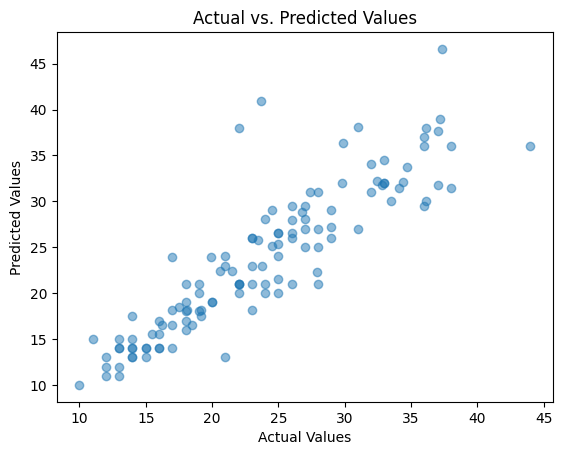

In [84]:
# import matplotlib.pyplot as plt

plt.scatter(y_test, y_1, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
# Here we can see that our model's mean absolute error is high compared to sklearn model's